In [1]:
import warnings
import torch
import torch.utils.data
import torchvision
import cv2

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import torch.nn as nn


from torchvision import transforms
from sklearn.model_selection import train_test_split
from torch.utils.data import Subset
from tqdm import tqdm

from pathlib import Path

from PIL import Image, ImageOps

import models.MathNet as mnt

In [2]:
BATCH_SIZE = 256
EPOCHS = 32

device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
device

device(type='cuda', index=0)

In [3]:
desired_size = (112, 112)

In [4]:
# the training transforms
train_transform = transforms.Compose([
    transforms.Resize(desired_size),
    transforms.Grayscale(1)
    
])


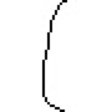

In [5]:
dataset = torchvision.datasets.ImageFolder('T:\my_programs\Math_recognition\TRAIN\dataset_balance', transform=train_transform)
display(dataset[112][0])

In [6]:
classes_dict = dataset.class_to_idx
classes = []
for key in classes_dict.keys():
    classes.append(str(key))
classes.sort()
#classes

In [7]:
# classes = ['!', '(', ')', '+', ',', '-', 
#            '0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '=', 
#            'A', 'C', 'Delta', 'G', 'H', 'M', 'N', 'R', 'S', 'T', 'X', '[', ']', 
#            'alpha', 'ascii_124', 'b', 'beta', 'chi', 'cos', 'd', 'div', 'e', 'exists', 
#            'f', 'forall', 'forward_slash', 'gamma', 'geq', 'greater', 'gt', 
#            'i', 'in', 'infty', 'int', 'j', 'k', 'l', 'lambda', 'ldots', 'leq', 
#            'lim', 'log', 'lt', 'mu', 'neq', 'o', 'omega', 'p', 'phi', 'pi', 'pm', 'prime', 
#            'q', 'rightarrow', 'sigma', 'sin', 'sqrt', 'sum', 'tan', 'theta', 'times', 
#            'u', 'upsilon', 'v', 'w', 'y', 'z', '{', '}']

NUM_CLASSES = len(classes)

def map_pred(ind):
    if ind < NUM_CLASSES:
        return classes[ind]
    return 'ERROR MAPPIMG'
NUM_CLASSES

44

In [8]:
train_loader = torch.utils.data.DataLoader(
    dataset, batch_size=BATCH_SIZE, shuffle=False,
    num_workers=6, pin_memory=True
)


In [9]:
def resize():
    path = "TRAIN/images_resized_to"+str(desired_size[0])+"/"
    counter = 0
    for p in tqdm(dataset, total=int(len(dataset))):
        true_name = map_pred(p[1])
        Path(path + true_name).mkdir(parents=True, exist_ok=True)
        
        #image = np.array(p[0])
        #gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
        #thresh = 250
        #ret, thresh_img = cv2.threshold(image, thresh, 255, cv2.THRESH_BINARY)
        #img_erode = cv2.erode(thresh_img, np.ones((3, 3), np.uint8), iterations=1)
        
        #cv2.imwrite(path + true_name + '/' + str(counter)+'.jpg', img_erode)
        #rotated.save(path + true_name + '/' + str(counter)+'.jpg')
        train_transform(p[0]).save(path + true_name +'/' + str(counter)+'.jpg')
        counter+=1


In [10]:
resize()

100%|██████████| 133566/133566 [05:13<00:00, 426.03it/s]


In [19]:
def dummy():
    counter = 0
    true_name = ''
    classes = []
    for p in dataset:
        #print(p)
        true_name1 = str(p[1])#map_pred(p[1])
        if true_name != true_name1:
            true_name = true_name1
            classes.append(true_name)
            Path("dummy"+str(desired_size[0])+"/"+true_name).mkdir(parents=True, exist_ok=True)
            p[0].save("dummy"+str(desired_size[0])+"/" + true_name + '/' + str(counter)+'.jpg')
            
        if counter % 1000 == 0:
            print(len(dataset)-counter)
        #Path("new/"+str(p[1])).mkdir(parents=True, exist_ok=True)
        #torch.save(p[0], 'new/'+str(p[1]) + str(counter)+'.jpg')
        counter+=1
    return classes

In [20]:
def add_contrast(x, factor):
    return transforms.functional.adjust_contrast(x, factor)

In [21]:
def contrast():
    path = "images_contrast_to"+str(desired_size[0])+"/"
    counter = 0
    for p in tqdm(dataset, total=int(len(dataset))):
        true_name = map_pred(p[1])
        Path(path + true_name).mkdir(parents=True, exist_ok=True)
        
        #display(p[0])
        image = add_contrast(p[0], 3)
        
        #display(image)
        
        image.save(path + true_name + '/' + str(counter)+'.jpg')
#         Path("new/"+str(p[1])).mkdir(parents=True, exist_ok=True)
#         torch.save(p[0], 'new/'+str(p[1]) + str(counter)+'.jpg')
        counter+=1

In [22]:
contrast()

100%|███████████████████████████████████████████████████████████████████████████████| 173/173 [00:01<00:00, 139.67it/s]


In [51]:
import os

root, dirs, files = os.walk("F:\my_programs\python\image_recognition\\all_dataset").__next__()

dirs.sort()
print(dirs)

['(', ')', ',', '-', '0', '1', '2', '3', '4', '5', '6', '7', '8', '9', 'A', 'F', 'X', 'Y', 'Z', 'alpha', 'and', 'beta', 'delta', 'exists', 'forall', 'gamma', 'lambda', 'mu', 'not', 'omega', 'or', 'phi', 'pi', 'psi', 'rightarrow', 'sigma', 'tau', 'theta', 'upsilon']


EMNIST dataset

In [8]:
import torch 
import torch.nn as nn
from torch import optim
from torch.utils.data import Dataset, TensorDataset, DataLoader 
import matplotlib.pyplot as plt
from IPython.display import clear_output
from tqdm import tqdm
from torchvision.datasets import MNIST
import torchvision
import torchvision.transforms.v2 as T
from torch.optim.lr_scheduler import StepLR
from PIL import Image

import pandas as pd
import numpy as np
import cv2

# Создается класс для чтения dataset из csv файла 
class CustomDatasetEMNIST():
    def __init__(self, csv_file_path, 
                 transform=None,
                 nrows=None,
                 skiprows=None) :
        '''nrows - кол-во строк которое необходимо подгрузить,
        '''
        super().__init__()
        self.data, self.targets, self.dataframe = self._load_data(csv_file_path=csv_file_path, nrows=nrows, skiprows=skiprows)
        
        self.transform = transform
        
    def __len__(self) :
        return len(self.data) 
    
    def __getitem__(self, index) :
       
        img = self.data[index]
        #print(f'1. {img.shape=} {img}/n') 
        img = img.unsqueeze(0)
        #print(f'2.{img.shape=} {img}/n') 
        targets = int(self.targets[index])
        # Повернем и отразим изображение для лучшего восприятия
        img = torchvision.transforms.functional.rotate(img=img, angle=-90)
        img = torch.flip(img, dims=(2,))
        
        #print(f'3 {img.shape} {img} /n') 
        
        if self.transform is not None:
            #print(f'3. {img.shape} {img}') 

            img = self.transform(img)
            #print(f'4.{img.shape} {img}') 

            
        return img, targets
    
    
    def _load_data(self,
                  csv_file_path,
                  nrows,
                  skiprows=None):
        
        df = pd.read_csv(csv_file_path, nrows=nrows, skiprows=skiprows) 
        
        targets = torch.tensor(df.iloc[:,0].values)
        
        data = df.iloc[:,1:].values.reshape((len(df), 28, 28))
        
        return torch.tensor(data).float(), targets, df



In [13]:
# Зададим трансформацию для трейн и тест датасетов
train_transform = T.Compose(
    [
        T.Resize([224, 224]),
        T.RandomRotation(degrees=10),
        T.Grayscale(1),
        #transforms.ToPILImage()
    ]
)

In [14]:

train_dataset = CustomDatasetEMNIST(csv_file_path='E:\TRAIN\emnist/emnist-byclass-train.csv', 
                                    
#                                     skiprows=50000,
                                    nrows=1000, 
                                    transform=train_transform) 

valid_dataset = CustomDatasetEMNIST(csv_file_path='E:\TRAIN\emnist/emnist-byclass-test.csv',
#                                    nrows=100000, 
                                    transform=train_transform) 

train_loader = DataLoader(train_dataset, batch_size=1500, shuffle=False, num_workers=6, pin_memory=True) 
valid_loader = DataLoader(valid_dataset, batch_size=1500, shuffle=False, num_workers=6, pin_memory=True) 

In [16]:
from pathlib import Path

def resize():
    path = "E:\TRAIN\emnist2\\"
    counter = 0
    for p in tqdm(train_dataset, total=int(len(train_dataset))):
        Path(path + str(p[1])).mkdir(parents=True, exist_ok=True)
        
        image = p[0].numpy().transpose(1, 2, 0)
        #image = cv2.bitwise_not(image)
        image = 255 - image
        cv2.imwrite(path + str(p[1]) +'/' + str(counter)+'.jpg', image)
        #rotated.save(path + true_name + '/' + str(counter)+'.jpg')
        #print(train_transform(p[0]))
        train_transform(p[0])
        counter+=1

In [17]:
resize()

  0%|          | 0/1000 [00:00<?, ?it/s]e:\Programs\Anaconda3\envs\MyPyTorch\Lib\site-packages\torchvision\transforms\functional.py:1603: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), etc.) will change from None to True in v0.17, in order to be consistent across the PIL and Tensor backends. To suppress this warning, directly pass antialias=True (recommended, future default), antialias=None (current default, which means False for Tensors and True for PIL), or antialias=False (only works on Tensors - PIL will still use antialiasing). This also applies if you are using the inference transforms from the models weights: update the call to weights.transforms(antialias=True).
  warnings.warn(
100%|██████████| 1000/1000 [00:08<00:00, 123.30it/s]


In [ ]:
class MathNet(torch.nn.Module):
    def __init__(self):
        super(MathNet, self).__init__()
        self.dropout_percentage = 0.25
        
        #Block 1     in: 28x28x1
        #Block 1    out: 14x14x64
        self.conv1_1 = torch.nn.Conv2d(in_channels=1, out_channels=64, kernel_size=3, padding=1)
        self.bn1_1 = torch.nn.BatchNorm2d(num_features=64)
        self.conv1_2 = torch.nn.Conv2d(in_channels=64, out_channels=64, kernel_size=3, padding=1)
        self.bn1_2 = torch.nn.BatchNorm2d(num_features=64)
        self.conv1_3 = torch.nn.Conv2d(in_channels=64, out_channels=64, kernel_size=3, padding=1)
        self.bn1_3 = torch.nn.BatchNorm2d(num_features=64)
        self.act1  = torch.nn.ReLU()
        self.pool1 = torch.nn.MaxPool2d(kernel_size=2, stride=2, padding=1)
        self.dropout1 = nn.Dropout(p=self.dropout_percentage)
        
        #Block 2     in: 14x14x64
        #Block 2    out: 7x7x128
        self.conv2_1 = torch.nn.Conv2d(in_channels=64, out_channels=128, kernel_size=3, padding=1)
        self.bn2_1 = torch.nn.BatchNorm2d(num_features=128)
        self.conv2_2 = torch.nn.Conv2d(in_channels=128, out_channels=128, kernel_size=3, padding=1)
        self.bn2_2 = torch.nn.BatchNorm2d(num_features=128)
        self.conv2_3 = torch.nn.Conv2d(in_channels=128, out_channels=128, kernel_size=3, padding=1)
        self.bn2_3 = torch.nn.BatchNorm2d(num_features=128)
        self.act2  = torch.nn.ReLU()
        self.pool2 = torch.nn.MaxPool2d(kernel_size=2, stride=2, padding=1)
        self.dropout2 = nn.Dropout(p=self.dropout_percentage)
        
        #Block 2     in: 7x7x128
        #Block 2    out: 1x1x256
        self.conv3_1 = torch.nn.Conv2d(in_channels=128, out_channels=256, kernel_size=3, padding=1)
        self.bn3_1 = torch.nn.BatchNorm2d(num_features=256)
        self.conv3_2 = torch.nn.Conv2d(in_channels=256, out_channels=256, kernel_size=3, padding=1)
        self.bn3_2 = torch.nn.BatchNorm2d(num_features=256)
        self.conv3_3 = torch.nn.Conv2d(in_channels=256, out_channels=256, kernel_size=3, padding=1)
        self.bn3_3 = torch.nn.BatchNorm2d(num_features=256)
        self.act3  = torch.nn.ReLU()
        self.pool3 = torch.nn.AvgPool2d(kernel_size=7, stride=7, padding=0)
        self.dropout3 = nn.Dropout(p=self.dropout_percentage)
        
        self.fc1 = torch.nn.Linear(256, NUM_CLASSES)
    
    def forward(self, x):
        
        x = self.conv1_1(x)
        x = self.bn1_1(x)
        x = self.conv1_2(x)
        x = self.bn1_2(x)
        x = self.conv1_3(x)
        x = self.bn1_3(x)
        x = self.act1(x)
        x = self.pool1(x)
        
        x = self.conv2_1(x)
        x = self.bn2_1(x)
        x = self.conv2_2(x)
        x = self.bn2_2(x)
        x = self.conv2_3(x)
        x = self.bn2_3(x)
        x = self.act2(x)
        x = self.pool2(x)
        
        x = self.conv3_1(x)
        x = self.bn3_1(x)
        x = self.conv3_2(x)
        x = self.bn3_2(x)
        x = self.conv3_3(x)
        x = self.bn3_3(x)
        x = self.act3(x)
        x = self.pool3(x)

        x = x.view(x.size(0), x.size(1) * x.size(2) * x.size(3))
        x = self.fc1(x)  
        return x